In [1]:
#ライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta,uniform
from scipy import optimize

#グラフの見た目変更
plt.style.use("ggplot")

#乱数のSeedを固定
np.random.seed(999)

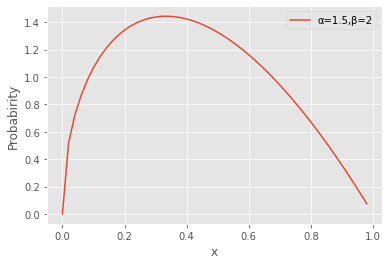

In [2]:
#Beta分布
X=np.arange(0,1,0.02)
dist_1=beta.pdf(X,1.5,2)

plt.plot(X,dist_1,label='α=1.5,β=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probabirity')
plt.savefig('./figure/fig_beta.jpg')
plt.show()

In [3]:
#Beta分布のパラメータ設定
a,b=1.5,2
#x軸を作成
x=np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),1000)
#Beta関数の密度関数を定義
p=beta(a,b).pdf
#最大化された結果(x座標)を取得
res=optimize.fmin(lambda x:-p(x),0.3)
#最大化された結果(y座標)を取得
y_max=p(res)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [4]:
#サンプリング数
NMCS=50000

#x軸方向のサンプリング（0～1の区間でサンプリング）
x_mcs=uniform.rvs(size=NMCS)

#y軸方向のサンプリング（0～y_maxの区間でサンプリング）
r=uniform.rvs(size=NMCS)*y_max

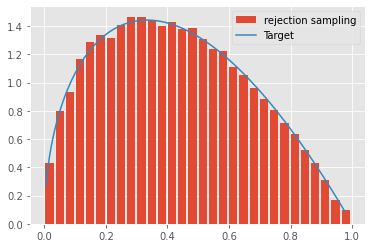

In [5]:
#Beta分布以下かどうかの条件判定
accept=x_mcs[r<=p(x_mcs)]

#結果の表示
plt.hist(accept,density=True,bins=30,rwidth=0.8,label='rejection sampling')
plt.plot(x,beta.pdf(x,a,b),label='Target')
plt.legend()
plt.savefig('./figure/fig_rejection_sampling.jpg')
plt.show()